# Descriptive Analyses

Intro tables to give context to the data

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("talk")
participants = pd.read_csv("../data/processed/mock_data/participant-schema.csv",index_col=0)
posts = pd.read_csv("../data/processed/mock_data/posts-schema.csv",index_col=0)
reshare_rates = pd.read_csv("../data/processed/mock_data/reshare_rates.csv")
print("Shape: {}x{}".format(*reshare_rates.shape))
reshare_rates.head()

Shape: 790x34


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PROLIFIC_ID,STUDY_ID,SESSION_ID,age,educationLevel,politicalAffiliation,attendsProtests,gender_female,gender_intersex,gender_male,...,socialMedias_tiktok,socialMedias_twitter,PROLIFIC_ID.1,treatment,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
0,1,1,79,146.0,NaN,right,0.0,0,0,1,...,0,1,1,Treatment,High,0.800000,0.50,0.0,0.500000,0.80
1,1,1,79,146.0,NaN,right,0.0,0,0,1,...,0,1,1,Treatment,Low,0.250000,1.00,0.0,0.333333,0.25
2,2,1,28,100.0,NaN,centreRight,0.0,1,0,0,...,0,1,2,Treatment,High,0.333333,0.75,0.0,0.000000,0.25
3,2,1,28,100.0,NaN,centreRight,0.0,1,0,0,...,0,1,2,Treatment,Low,0.000000,1.00,1.0,0.000000,0.00
4,3,1,32,64.0,communityCollege,centreLeft,1.0,0,1,1,...,0,1,3,Treatment,High,0.500000,0.00,0.0,1.000000,1.00


## Initial Tables

1. Participant statistics
2. Experiment descriptive statistics

### Participant statistics

In [29]:
from tableone import TableOne
table_one = TableOne(participants.reset_index().drop(["id",
                                                      "PROLIFIC_ID",
                                                      "STUDY_ID",
                                                      "SESSION_ID"],
                                                     axis=1))
table_one

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Missing      Overall
n                                                                           395
age, mean (SD)                                                   0  83.5 (38.6)
educationLevel, n (%)                     communityCollege      61    41 (12.3)
                                          doctorate                   57 (17.1)
                                          graduateSchool              53 (15.9)
                                          highSchool                  49 (14.7)
                                          none                        44 (13.2)
                                          secondary                   52 (15.6)
                                          undergrad                   38 (11.4)
politicalAffiliation, n (%)               centre                32    61 (16.8)
                                          centreLeft                  57 (15.7)
                                          centreRight                 67 (18.5)
                                          left                        70 (19.3)
                                          none                        54 (14.9)
                                          right                       54 (14.9)
attendsProtests, mean (SD)                                       8    0.5 (0.5)
gender_female, mean (SD)                                         0    0.3 (0.5)
gender_intersex, mean (SD)                                       0    0.3 (0.5)
gender_male, mean (SD)                                           0    0.3 (0.5)
gender_nonBinary, mean (SD)                                      0    0.3 (0.4)
gender_transgender, mean (SD)                                    0    0.3 (0.4)
affiliatedMovements_climate, mean (SD)                           0    0.2 (0.4)
affiliatedMovements_gender, mean (SD)                            0    0.2 (0.4)
affiliatedMovements_indigenous, mean (SD)                        0    0.2 (0.4)
affiliatedMovements_labour, mean (SD)                            0    0.2 (0.4)
affiliatedMovements_none, mean (SD)                              0    0.2 (0.4)
affiliatedMovements_race, mean (SD)                              0    0.2 (0.4)
affiliatedMovements_religion, mean (SD)                          0    0.2 (0.4)
socialMedias_facebook, mean (SD)                                 0    0.2 (0.4)
socialMedias_instagram, mean (SD)                                0    0.2 (0.4)
socialMedias_none, mean (SD)                                     0    0.2 (0.4)
socialMedias_reddit, mean (SD)                                   0    0.3 (0.4)
socialMedias_snapchat, mean (SD)                                 0    0.2 (0.4)
socialMedias_tiktok, mean (SD)                                   0    0.2 (0.4)
socialMedias_twitter, mean (SD)                                  0    0.2 (0.4)

### Experiment descriptive statistics

In [51]:
table_two = TableOne(posts.reset_index().drop(["id","PROLIFIC_ID","STUDY_ID","SESSION_ID","rumour","evidence","code","rumourId"],
                                              axis=1),
                     groupby=["treatment","evidence"],
                     pval=True)
table_two

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by treatment                                                
                                            Missing      Overall         False         True P-Value
n                                                           7900          3860         4040        
secondsTaken, mean (SD)                           0  90.2 (14.5)   89.6 (14.0)  90.7 (14.9)   0.001
mockGender, n (%)       Female                    0  3924 (49.7)   1891 (49.0)  2033 (50.3)   0.246
                        Male                         3976 (50.3)   1969 (51.0)  2007 (49.7)        
timestamp, mean (SD)                              0  29.7 (17.1)   29.6 (17.1)  29.9 (17.0)   0.393
warning, n (%)          False                     0  7541 (95.5)  3860 (100.0)  3681 (91.1)  <0.001
                        True                           359 (4.5)                  359 (8.9)        
reshared, n (%)         False                     0  3872 (49.0)   1922 (49.8)  1950 (48.3)   0.182
                        True                         4028 (51.0)   1938 (50.2)  2090 (51.7)

In [53]:
table_three = reshare_rates.groupby(["treatment","evidence"])[["Affirms",
                                                 "Denies",
                                                 "Neutral",
                                                 "Questions",
                                                 "rumour_proportion"]].mean().T
table_three


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


treatment           Control           Treatment          
evidence               High       Low      High       Low
Affirms            0.535696  0.445032  0.653577  0.332850
Denies             0.435815  0.559088  0.384211  0.691136
Neutral            0.384715  0.338515  0.402228  0.356683
Questions          0.433679  0.411140  0.437624  0.389686
rumour_proportion  0.535922  0.432284  0.646416  0.344382

## Sample Visualizations

## Hypotheses


The presence of credibility indicators in the system will:

- $H_1$: *decrease* the *affirmation rate* for rumours with lower evidence levels.
- $H_2$: *increase* the *denial rate* for rumours with lower evidence levels.
- $H_3$: *increase* the *affirmation rate* for rumours with higher evidence levels.
- $H_4$: *decrease* the *denial rate* for rumours with higher evidence levels.

**Some visualizations**

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


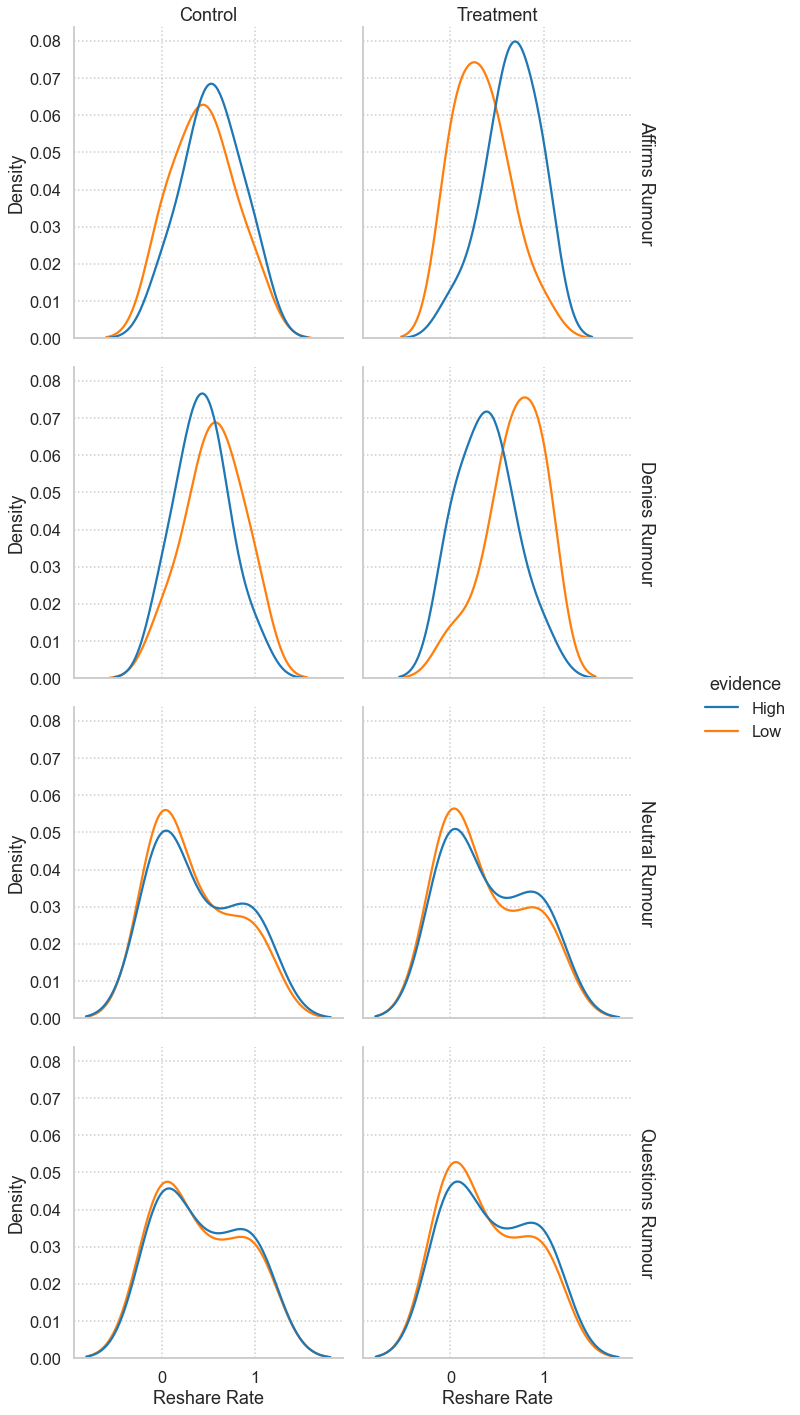

In [55]:
melted = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],
                            value_vars=reshare_rates.columns[-5:-1],
                            var_name='code', 
                            value_name='reshared')
sorting_dict = {'Control': 0, 
                'Treatment': 1, 
                'Affirms': 0,
                'Denies': 1,
                'Neutral': 2,
                'Questions': 3,
                'High': 0,
                'Low': 1}
melted = melted.sort_values(by=['treatment','code','evidence'],key=lambda x: x.map(sorting_dict))

g = sns.displot(data=melted, 
            x="reshared",
            hue="evidence",
            col="treatment",
            row="code",
            bw_adjust=1.8,
            facet_kws={"margin_titles":True},
            kind="kde")
g.set_titles(col_template="{col_name}", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Reshare Rate")
# g.fig.savefig("../figures/descriptive_analysis/reshare_rate-hist.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


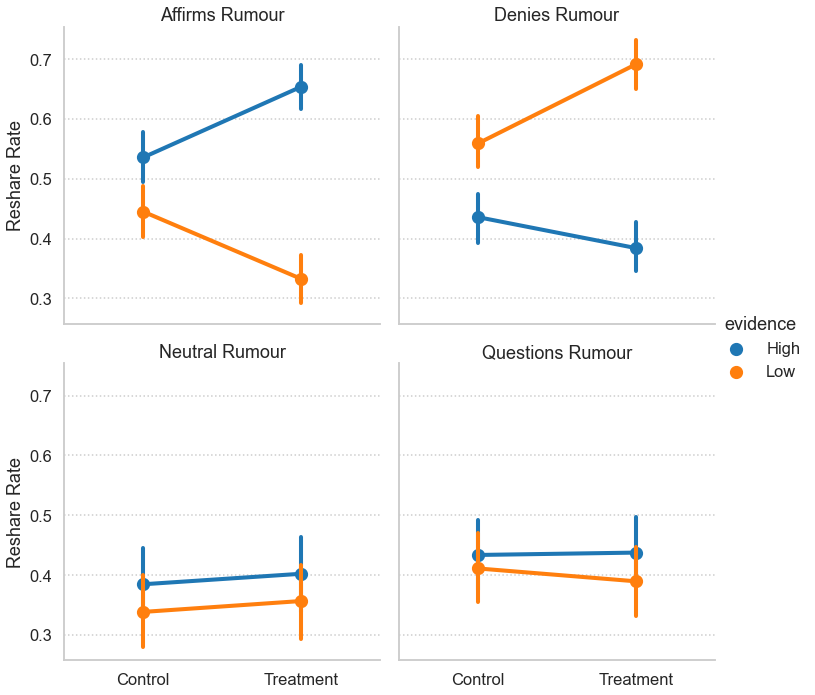

In [56]:
g = sns.catplot(data=melted, 
            x="treatment",
            y="reshared",
            hue="evidence",
            col="code",
            col_wrap=2,
            margin_titles=True,
            kind="point")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="")
# g.savefig("../figures/descriptive_analysis/reshare_rate-point_plot.pdf")

### Rumour Proportion Figures

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


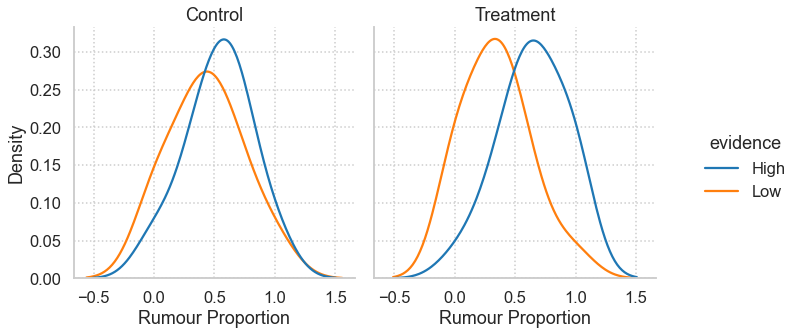

In [47]:
reshare_rates = reshare_rates.sort_values(by=['treatment','evidence'],key=lambda x: x.map(sorting_dict))
g = sns.displot(data=reshare_rates, 
                x="rumour_proportion",
                hue="evidence",
                col="treatment",
                bw_adjust=1.8,
                facet_kws={"margin_titles":True},
                kind="kde")
g.set_titles(col_template="{col_name}", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Rumour Proportion")
g.fig.savefig("../figures/descriptive_analysis/rumour_prop-hist.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


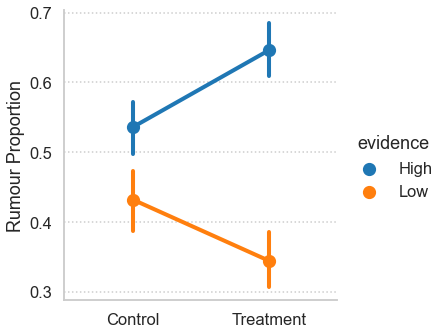

In [50]:
g = sns.catplot(data=reshare_rates, 
                x="treatment",
                y="rumour_proportion",
                hue="evidence",
                margin_titles=True,
                kind="point")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Rumour Proportion",x_var="")
g.savefig("../figures/descriptive_analysis/rumour_prop-point_plot.pdf")

**DISREGARD FROM HERE ON OUT**

*old statistical analyses that need to be refactored and moved to the system analysis script*

### $H_1$

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Add a random effect for the participant ID since there are repeated measures

md = smf.ols(f"Affirms ~ C(treatment)*C(evidence) + (1 | PROLIFIC_ID)",#"+ age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
             reshare_rates).fit()
md.summary()

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Affirms   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     32.70
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           3.05e-25
Time:                        13:50:03   Log-Likelihood:                -148.29
No. Observations:                 790   AIC:                             306.6
Df Residuals:                     785   BIC:                             329.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.5480      0.029     19.214      0.000       0.492       0.604
C(treatment)[T.Treatment]                        0.1175      0.029      3.987      0.000       0.060       0.175
C(evidence)[T.Low]                              -0.0907      0.030     -3.041      0.002      -0.149      -0.032
C(treatment)[T.Treatment]:C(evidence)[T.Low]    -0.2301      0.042     -5.519      0.000      -0.312      -0.148
1 | PROLIFIC_ID                              -4.662e-05   7.29e-05     -0.640      0.523      -0.000    9.65e-05
==============================================================================
Omnibus:                       15.835   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.989
Skew:                           0.037   Prob(JB):                       0.0112
Kurtosis:                       2.483   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
table = sm.stats.anova_lm(md, typ=2) # Type 2 Anova DataFrame
table

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sum_sq,df,F,PR(>F)
C(treatment),0.001242,1.0,0.014481,9.042461e-01
C(evidence),8.570643,1.0,99.929046,3.151496e-22
C(treatment):C(evidence),2.612034,1.0,30.454893,4.643925e-08
1 | PROLIFIC_ID,0.035084,1.0,0.409060,5.226338e-01
Residual,67.327321,785.0,NaN,NaN


In [26]:
md2 = smf.mixedlm(f"Affirms ~ C(treatment)*C(evidence)",#"+ age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
                     reshare_rates,
                     groups=reshare_rates["PROLIFIC_ID"]).fit()
md2.summary()

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Mixed Linear Model Regression Results
=======================================================================================
Model:                        MixedLM           Dependent Variable:           Affirms  
No. Observations:             790               Method:                       REML     
No. Groups:                   395               Scale:                        0.0809   
Min. group size:              2                 Log-Likelihood:               -159.6994
Max. group size:              2                 Converged:                    Yes      
Mean group size:              2.0                                                      
---------------------------------------------------------------------------------------
                                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------
Intercept                                     0.536    0.021 25.421 0.000  0.494  0.577
C(treatment)[T.Treatment]                     0.118    0.029  4.000 0.000  0.060  0.176
C(evidence)[T.Low]                           -0.091    0.029 -3.130 0.002 -0.147 -0.034
C(treatment)[T.Treatment]:C(evidence)[T.Low] -0.230    0.040 -5.681 0.000 -0.309 -0.151
Group Var                                     0.005    0.016                           
=======================================================================================

"""